# Final Assessment Scratch Pad

## Instructions

1. Please use only this Jupyter notebook to work on your model, and **do not use any extra files**. If you need to define helper classes or functions, feel free to do so in this notebook.
2. This template is intended to be general, but it may not cover every use case. The sections are given so that it will be easier for us to grade your submission. If your specific use case isn't addressed, **you may add new Markdown or code blocks to this notebook**. However, please **don't delete any existing blocks**.
3. If you don't think a particular section of this template is necessary for your work, **you may skip it**. Be sure to explain clearly why you decided to do so.

## Report

**[TODO]**

Please provide a summary of the ideas and steps that led you to your final model. Someone reading this summary should understand why you chose to approach the problem in a particular way and able to replicate your final model at a high level. Please ensure that your summary is detailed enough to provide an overview of your thought process and approach but also concise enough to be easily understandable. Also, please follow the guidelines given in the `main.ipynb`.

This report should not be longer than **1-2 pages of A4 paper (up to around 1,000 words)**. Marks will be deducted if you do not follow instructions and you include too many words here. 

**[DELETE EVERYTHING FROM THE PREVIOUS TODO TO HERE BEFORE SUBMISSION]**

##### Overview
**[TODO]**

##### 1. Descriptive Analysis
**[TODO]**

##### 2. Detection and Handling of Missing Values
**[TODO]**

##### 3. Detection and Handling of Outliers
**[TODO]**

##### 4. Detection and Handling of Class Imbalance 
**[TODO]**

##### 5. Understanding Relationship Between Variables
**[TODO]**

##### 6. Data Visualization
**[TODO]** 
##### 7. General Preprocessing
**[TODO]**
 
##### 8. Feature Selection 
**[TODO]**

##### 9. Feature Engineering
**[TODO]**

##### 10. Creating Models
**[TODO]**

##### 11. Model Evaluation
**[TODO]**

##### 12. Hyperparameters Search
**[TODO]**

##### Conclusion
**[TODO]**

---

# Workings (Not Graded)

You will do your working below. Note that anything below this section will not be graded, but we might counter-check what you wrote in the report above with your workings to make sure that you actually did what you claimed to have done. 

## Import Packages

Here, we import some packages necessary to run this notebook. In addition, you may import other packages as well. Do note that when submitting your model, you may only use packages that are available in Coursemology (see `main.ipynb`).

In [1]:
import pandas as pd
import os
import numpy as np
from util import show_images, dict_train_test_split
from scipy import stats

## Load Dataset

The dataset provided is multimodal and contains two components, images and tabular data. The tabular dataset `tabular.csv` contains $N$ entries and $F$ columns, including the target feature. On the other hand, the image dataset `images.npy` is of size $(N, H, W)$, where $N$, $H$, and $W$ correspond to the number of data, image width, and image height, respectively. Each image corresponds to the data in the same index of the tabular dataset. These datasets can be found in the `data/` folder in the given file structure.

A code snippet that loads and displays some of the data is provided below.

### Load Tabular Data

In [2]:
df = pd.read_csv(os.path.join('data', 'tabular.csv'))

### Load Image Data

Shape: (357699, 8, 8)


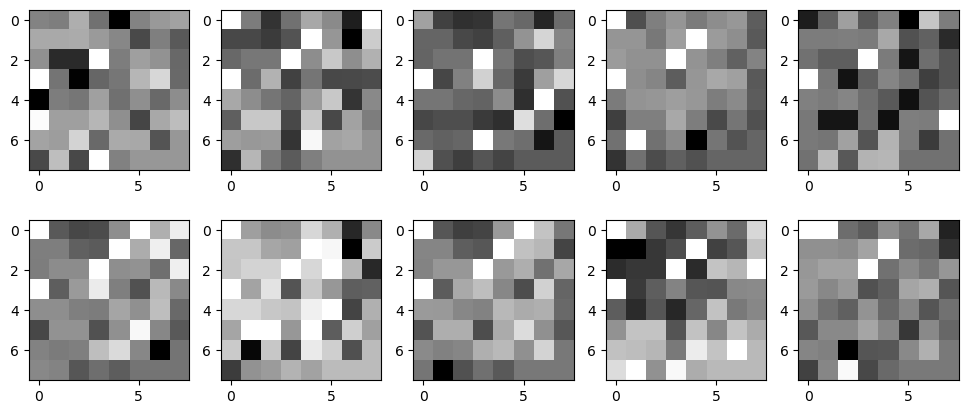

In [3]:
with open(os.path.join('data', 'images.npy'), 'rb') as f:
    images = np.load(f)
    
print('Shape:', images.shape)
show_images(images[:10], n_row=2, n_col=5, figsize=[12,5])

In [65]:
def plot_graph(df: pd.DataFrame):
    label = df.columns

    # get the data
    data = df.values

    # plot the distribution of each column
    # Set up the subplots
    num_rows = 15
    num_cols = 4
    _, axes = plt.subplots(num_rows, num_cols, figsize=(60, 60))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot the distribution of each column
    for i, col in enumerate(df.columns):
        ax = axes[i]
        
        if df[col].dtype == 'object':
            sns.countplot(x=col, data=df, ax=ax)
        else:
            sns.histplot(df[col], kde=True, ax=ax)
        
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

## Data Exploration & Preparation

### 1. Descriptive Analysis

In [129]:
# Describing the data
print(f"Shape of the tabular dataset: {df.shape}")
print(f"Shape of the image dataset: {images.shape}")

# Getting the types of the columns
print(f"Getting the types: {df.dtypes}")

Shape of the tabular dataset: (357699, 61)
Shape of the image dataset: (357699, 8, 8)
Getting the types: V0        float64
V1        float64
V2        float64
V3        float64
V4        float64
           ...   
V56         int64
V57         int64
V58        object
V59       float64
target    float64
Length: 61, dtype: object


### 2. Detection and Handling of Missing Values

In [134]:
# Remove missing data that are completely missing or has 2 or more missing values
print(f"before: {df.shape}")
target_df_missing = df.copy(deep=True)
target_images = images.copy()

# Drop na columns with more than threshold percent of missing values
threshold = 0.5
target_df_missing = target_df_missing.dropna(axis=1, thresh=threshold * len(target_df_missing))

print(f"shape: {target_df_missing.shape}, {target_images.shape}")

# # for col in target_df_missing.columns:
#     if target_df_missing[col].dtype != np.float64 and target_df_missing[col].dtype != np.int64:
#         target_df_missing.dropna(subset=[col], inplace=True)
#     else:
#         target_df_missing[col].fillna(target_df_missing[col].median(), inplace=True)

# # V39 has all missing values here unformtunately
# target_df_missing.dropna(axis=1, how='all', inplace=True)

before: (357699, 61)
shape: (357699, 58), (357699, 8, 8)


### 3. Detection and Handling of Outliers

In [135]:
# Remove outliers (> 3S.D.)
target_df_outliers = target_df_missing.copy(deep=True)
print(f"Before: {target_df_missing.shape}")

standard_deviations = 3
for col in target_df_outliers.columns:
    if target_df_outliers[col].dtype == np.object_:
        continue
    
    # Removing outliers using z-score and std
    target_df_outliers = target_df_outliers[
        ((target_df_outliers[col] - target_df_outliers[col].mean()) / target_df_outliers[col].std()).abs() < standard_deviations
    ]

# Drop the rest of the na values
target_df_outliers.dropna(inplace=True)

# Applying the indices to the images
target_images = target_images[target_df_outliers.index]
print(f"After: {target_df_outliers.shape}, {target_images.shape}")

Before: (357699, 58)
After: (129117, 58), (129117, 8, 8)


### 4. Detection and Handling of Class Imbalance

In [124]:
def random_oversampling_binary(df: pd.DataFrame) -> pd.DataFrame:
    """
    Given a dataset, oversample the minority class to have equal number of data as the majority class.

    Parameters
    ----------
    df: pd.DataFrame
        The potentially imbalanced dataset.

    Returns
    -------
    Oversampled dataset with equal number of data for each class.
    """

    for col in df.columns:
        if df[col].dtype != np.object_:
            continue
        
        if df[col].unique().__len__() > 2:
            continue
        
        col_classes = df[col].unique()
        max_sample = df[col].value_counts().max()
        
        df_class_1 = df[df[col] == col_classes[0]].sample(n=max_sample, replace=True)
        df_class_2 = df[df[col] == col_classes[1]].sample(n=max_sample, replace=True)
        df = pd.concat([df_class_1, df_class_2], axis=0)
    return df

In [125]:
print(f"Before: {target_df_outliers.shape}")

# Oversample the minority class
target_df_oversampled = random_oversampling_binary(target_df_outliers)
plot_graph(target_df_oversampled)

print(f"After: {target_df_oversampled.shape}")

Before: (129117, 58)


IndexError: index 1 is out of bounds for axis 0 with size 1

### 5. Understanding Relationship Between Variables

### 6. Data Visualization

/Users/kurtyjlee/anaconda3/envs/cs2109s-boosted/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kurtyjlee/anaconda3/envs/cs2109s-boosted/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kurtyjlee/anaconda3/envs/cs2109s-boosted/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kurtyjlee/anaconda3/envs/cs2109s-boosted/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

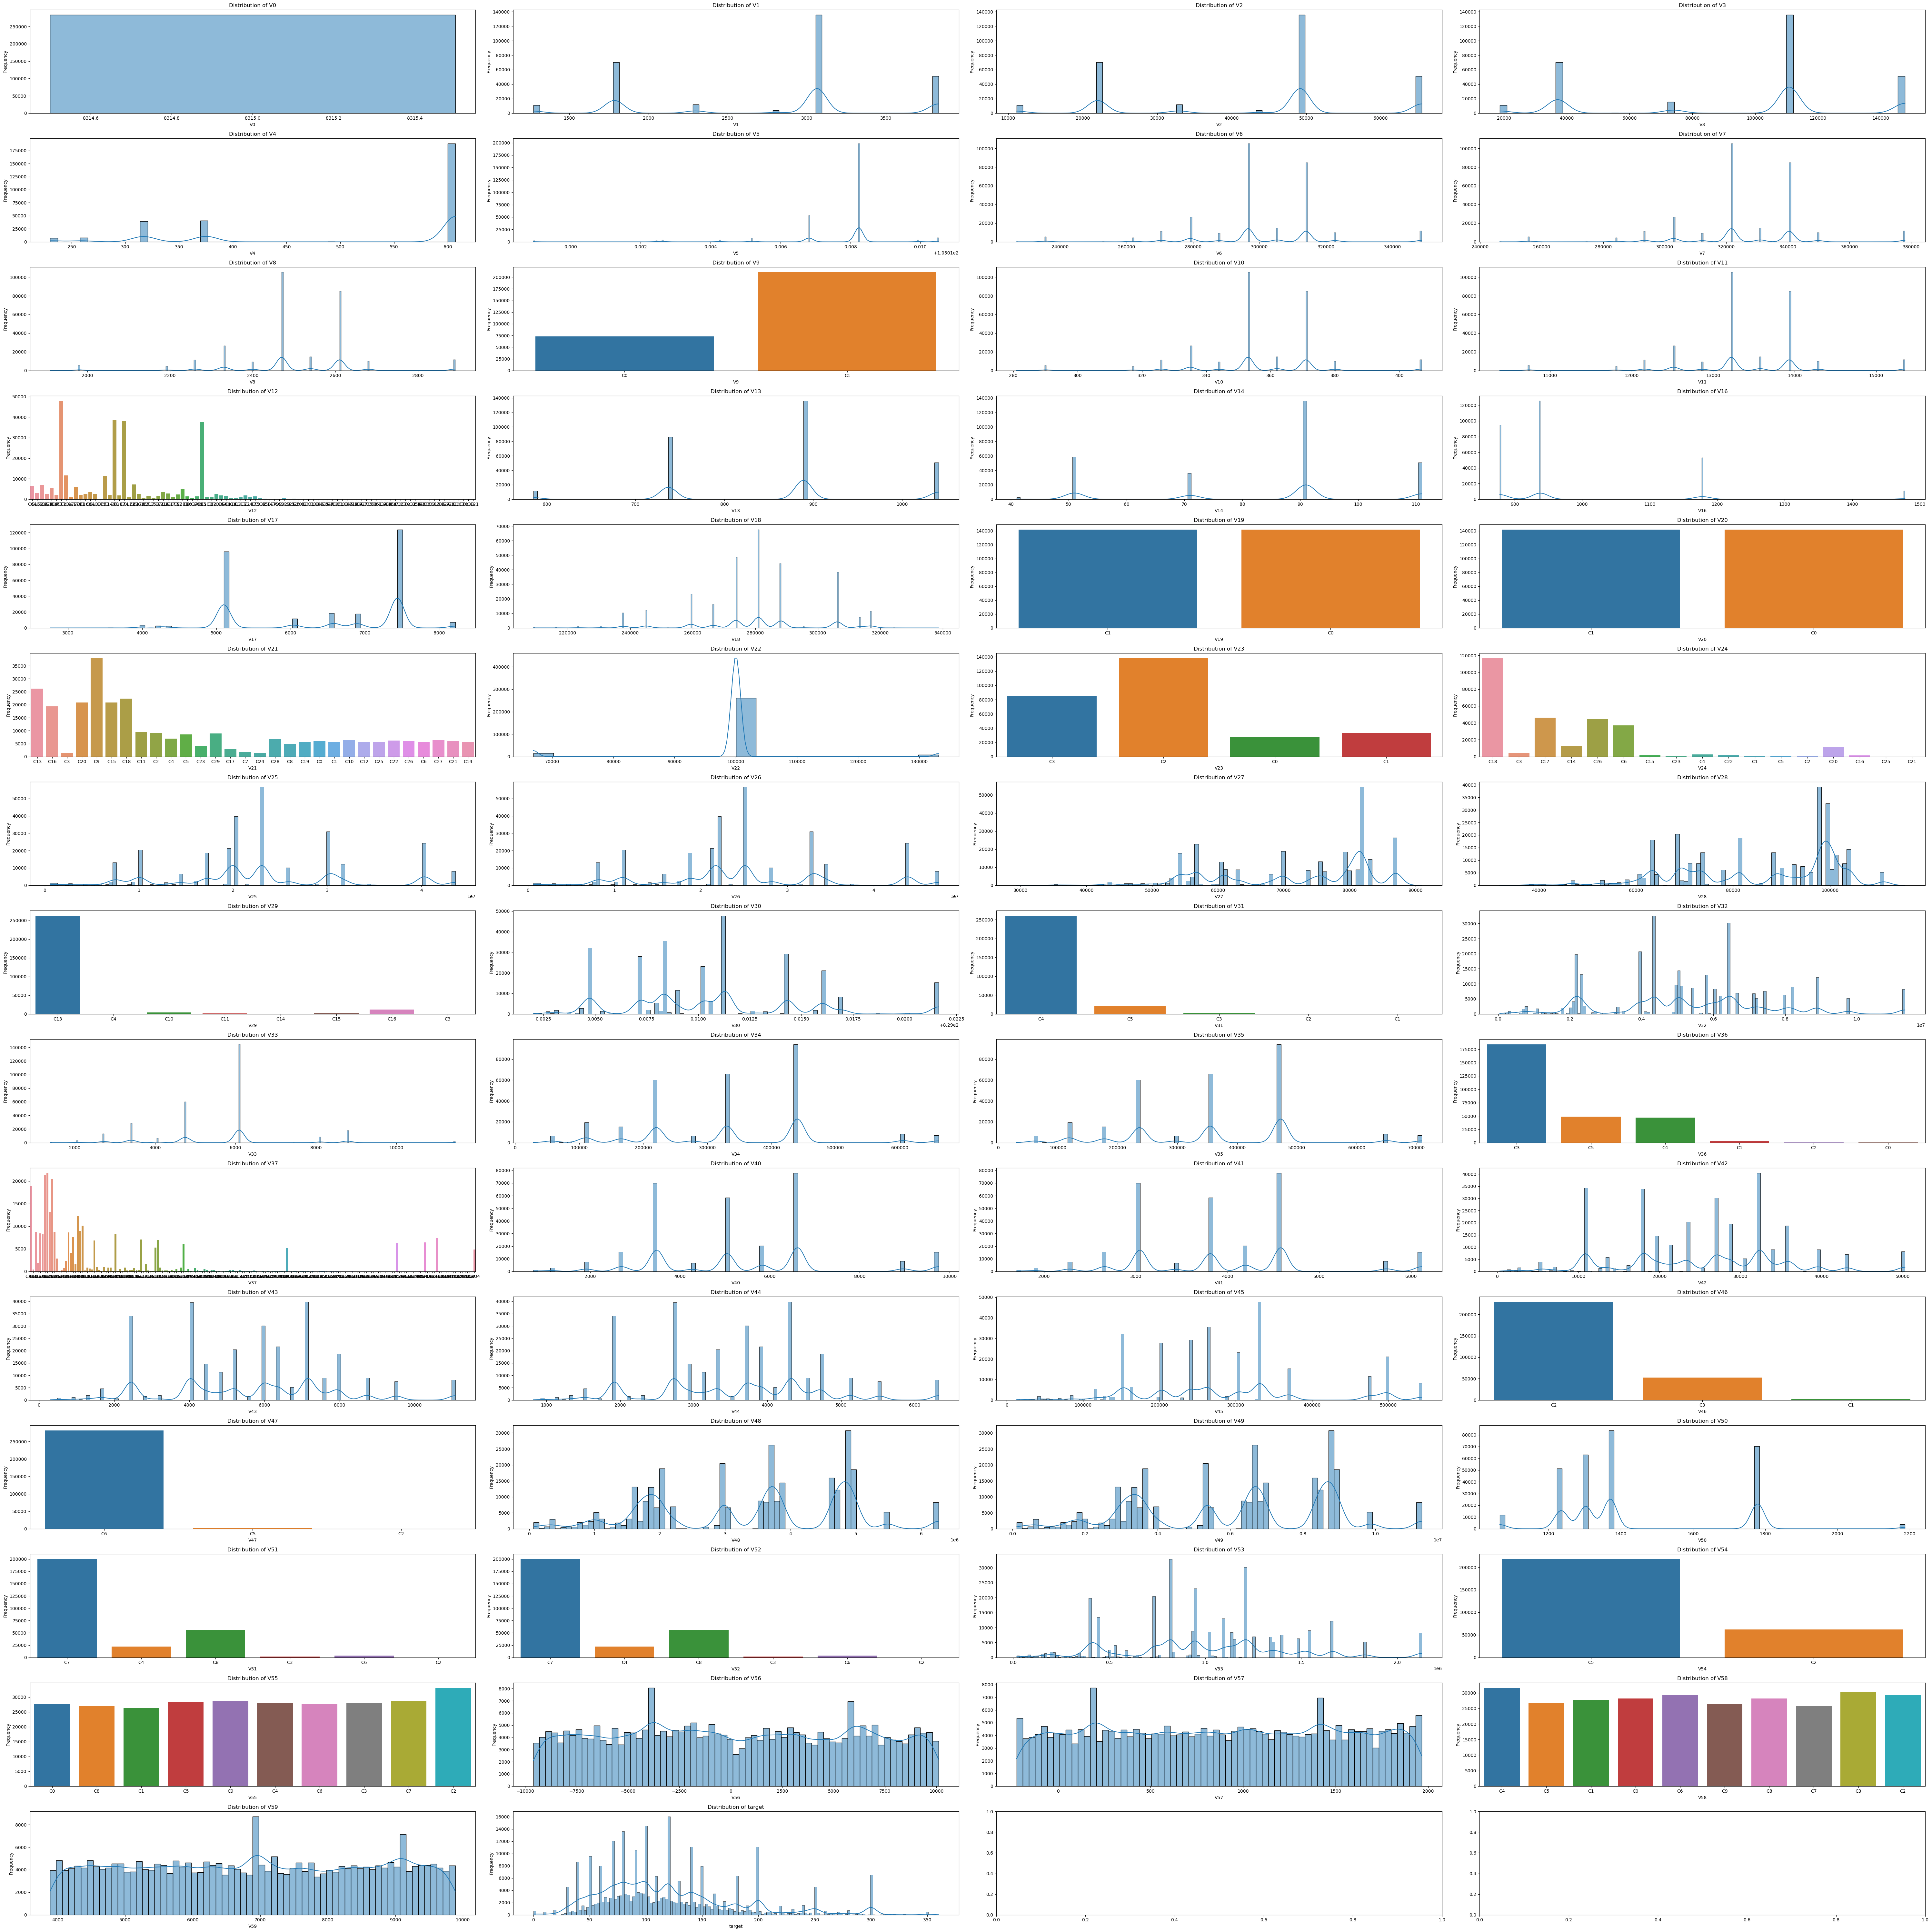

In [68]:
target_df_class = target_df_oversampled.copy(deep=True)
plot_graph(target_df_class)

## Data Preprocessing

### 7. General Preprocessing

In [161]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Split the data into train and test
X_part = target_df_outliers.drop(columns=['target']).reset_index().to_numpy()
y_part = target_df_outliers['target'].to_numpy()

# Encode categorical data
enc = preprocessing.OrdinalEncoder()
X_part = enc.fit_transform(X_part)
y_part = enc.fit_transform(y_part.reshape(-1, 1))
y_part = y_part.ravel()

print(f"X_part: {X_part.shape} y_part: {y_part.shape} image: {target_images.shape}")

# Split the data into train and test
X_train, X_test, images_train, images_test, y_train, y_test = train_test_split(X_part, y_part, target_images, test_size=0.2, random_state=42)

# Getting indices for images
index_train = X_train[:, 0].astype(int)
index_test = X_test[:, 0].astype(int)

# Removing index column
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

# Getting the images
images_train = target_images[index_train]
images_test = target_images[index_test]

print(
    f"X_train: {X_train.shape} image_train: {images_train.shape} y_train: {y_train.shape}",
    f"X_test: {X_test.shape} image_test: {images_test.shape} y_test: {y_test.shape}"
)

X_part: (129117, 58) y_part: (129117,) image: (129117, 8, 8)
X_train: (103293, 57) image_train: (103293, 8, 8) y_train: (103293, 8, 8) X_test: (25824, 57) image_test: (25824, 8, 8) y_test: (25824, 8, 8)


### 8. Feature Selection

In [127]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

print(f"Before: {X_train.shape}")

# Select features using LassoCV
clf = LassoCV().fit(X_train, y_train)
m = SelectFromModel(clf, prefit=True)

target = m.transform(X_train)

print(target.shape)

Before: (103293, 57)
(103293, 8)


### 9. Feature Engineering

## Modeling & Evaluation

### 10. Creating models

### 11. Model Evaluation

### 12. Hyperparameters Search